# SME0828 - Introdução à Ciência de Dados
### PROJETO FINAL - QUAL O MELHOR MODELO PARA CLASSIFICAÇÃO DA POTABILIDADE DA ÁGUA 
#### Professor: Francisco A. Rodrigues  
Aluno: Arthur Antonio Rezende Pereira. 
Aluno: Felipe da Costa Coqueiro. 
Aluno: Mauricio Marques Casagrandi. 

#### Introdução

O acesso à água potável é uma das necessidades essenciais de todos os seres humanos. Do ponto de vista legal, ele é reconhecido como um dos direitos humanos fundamentais. Além disso, a qualidade da água é um aspecto crucial da gestão ambiental, sendo essencial medir diversos parâmetros físicos, químicos e biológicos para monitorá-la de forma eficaz. Esses fatores tornam a análise da qualidade da água um dos principais focos de pesquisa em aprendizado de máquina. 

Dito isso, neste projeto será realizada a classificação da potabilidade da água com base em seus atributos, buscando determinar o melhor modelo para essa tarefa. O conjunto de dados utilizado contém 3.276 registros com medições de nove parâmetros críticos amplamente empregados no monitoramento e análise da qualidade da água. Ele oferece um panorama representativo das condições da água, sendo uma excelente base para estudos e análises.

### Parâmetros de Qualidade da Água

**pH:** Mede o nível de acidez ou alcalinidade de uma solução em uma escala de 0 a 14. Valores abaixo de 7 indicam condições ácidas, valores acima de 7 indicam condições alcalinas, e um valor igual a 7 representa um estado neutro.

**Hardness (Dureza):** Refere-se à concentração de minerais, principalmente cálcio e magnésio, dissolvidos na água. Altos níveis de dureza podem causar incrustações em tubulações e equipamentos, enquanto baixos níveis indicam água macia.

**Solids (Sólidos):** Mede a concentração total de sólidos dissolvidos (TDS) na água, incluindo sais, minerais e outros compostos. Níveis elevados de sólidos podem afetar o sabor da água e indicar poluição ou intrusão de substâncias indesejadas.

**Chloramines (Cloraminas):** Compostos químicos usados como desinfetantes na água potável para controlar microorganismos. Altos níveis podem afetar o gosto e o odor da água, enquanto baixos níveis podem reduzir sua eficácia na desinfecção.

**Sulfate (Sulfato):** Mede a concentração de sulfato na água, um composto químico natural. Embora seja essencial em pequenas quantidades, níveis elevados podem causar sabor desagradável e possíveis efeitos laxativos em seres humanos.

**Conductivity (Condutividade):** Refere-se à capacidade da água de conduzir eletricidade, diretamente relacionada à presença de íons dissolvidos. Altos níveis de condutividade geralmente indicam maior salinidade ou presença de poluentes.

**Organic Carbon (Carbono Orgânico):** Mede a quantidade de carbono presente em compostos orgânicos dissolvidos na água. Altos níveis podem indicar poluição por matéria orgânica e a presença de contaminantes que exigem tratamento.

**Trihalomethanes (Trihalometanos):** Compostos químicos formados como subprodutos da desinfecção da água quando cloro ou outros desinfetantes reagem com matéria orgânica. Altos níveis podem representar riscos à saúde a longo prazo.

**Turbidity (Turbidez):** Mede a quantidade de partículas em suspensão na água, afetando sua clareza. Alta turbidez pode indicar presença de sedimentos, microorganismos ou poluentes, reduzindo a qualidade da água.


#### Importação das Bibliotecas e Funções 

In [83]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import shapiro
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_validate,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [13]:
#Função para calcular coeficiente de pearson
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction',
                ha='center')
    ax.set_axis_off()

#### Análise Descritiva da Base de Dados
Nessa seção será fornecida uma visão geral dos dados, resumindo as principais características e tendências dos parâmetros da qualidade da água.

In [14]:
#Abrindo e conhecendo a base de dados
df = pd.read_csv('water_potability.csv')
print('Numero de linhas:',df.shape[0])
print('Numero de colunas:',df.shape[1])
df.head(15)

Numero de linhas: 3276
Numero de colunas: 10


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [15]:
# verificando se existem valores Not a Number
df.isna().sum()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Os dados faltantes foram substituídos pela mediana, pois ela é um valor mais robusto do que a média. A mediana não sofre grandes variações devido a valores extremos, ao contrário da média, o que a torna mais adequada para garantir a integridade da análise

In [ ]:
#Substituição pela mediana
df = df.fillna(df.median())
print('Numero de linhas:',df.shape[0])
print('Numero de colunas:',df.shape[1])
df.isna().sum()

Numero de linhas: 3276
Numero de colunas: 10


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [17]:
#Verificando se existem linhas duplicadas
print('Quantidade de linhas duplicadas: ',df.duplicated().sum())

Quantidade de linhas duplicadas:  0


É fundamental entender como se dá a distribuição dos dados. Primeiramente, é importante analisar se há uma grande diferença na quantidade de dados em cada classe. Neste caso, observa-se que a base de dados contém mais registros de água potável do que de água não potável. Mais adiante, será necessário ajustar esses dados para equilibrar as quantidades, facilitando assim o processo de classificação.

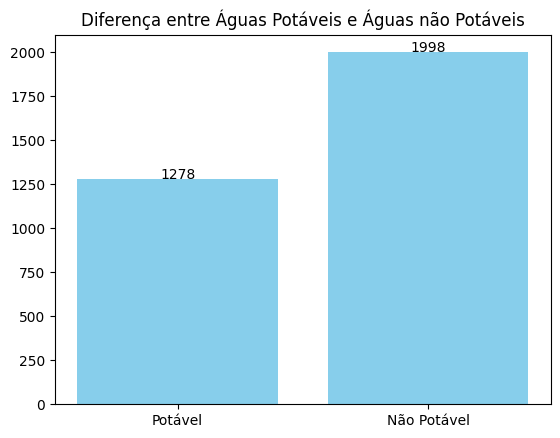

In [95]:
#Contabilizando
zero_count = df['Potability'].value_counts()[0] 
one_count = df['Potability'].value_counts()[1]

y = [one_count, zero_count]
x = ['Potável', 'Não Potável'] 

plt.bar(x,y,color='skyblue',)
plt.title('Diferença entre Águas Potáveis e Águas não Potáveis')
for i, value in enumerate(y):
    plt.text(x[i], value + 0.5, str(value), ha='center', fontsize=10, color='black')
plt.show()

In [19]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [99]:
# Calcular o Coeficiente de Variação (CV) para cada variável
cv = df.std() / df.mean() * 100

# Exibir o CV para cada variável
print("Coeficiente de Variação (CV) para cada variável:")
print(cv)

Coeficiente de Variação (CV) para cada variável:
ph                  20.780320
Hardness            16.743823
Solids              39.831625
Chloramines         22.227231
Sulfate             10.834216
Conductivity        18.963654
Organic_carbon      23.158340
Trihalomethanes     23.747262
Turbidity           19.672913
Potability         125.054294
dtype: float64


In [102]:
# Calcular o Coeficiente de Variação (CV) para cada variável
cv = df.std() / df.mean() * 100

# Definir um limite de CV para ser considerado significativo (por exemplo, 30%)
limite_cv = 30

# Filtrar variáveis com CV acima do limite definido
cv_significativo = cv[cv > limite_cv]

# Exibir variáveis com CV significativo
print("Variáveis com CV significativo:")
print(cv_significativo)
print('\n')

# Definir um limite de CV para ser considerado significativo (por exemplo, 30%)
limite_moderado = [10,20]

# Filtrar variáveis com CV acima do limite definido
cv_moderado = cv[(cv > limite_moderado[0]) & (cv <= limite_moderado[1])]

# Exibir variáveis com CV significativo
print("Variáveis com CV Moderado:")
print(cv_moderado)
print('\n')

# Definir um limite de CV para ser considerado significativo (por exemplo, 30%)
limite_cv = 10

# Filtrar variáveis com CV acima do limite definido
cv_baixo = cv[cv <= limite_cv]

# Exibir variáveis com CV significativo
print("Variáveis com CV significativo:")
print(cv_baixo)
print('\n')

Variáveis com CV significativo:
Solids         39.831625
Potability    125.054294
dtype: float64


Variáveis com CV Moderado:
Hardness        16.743823
Sulfate         10.834216
Conductivity    18.963654
Turbidity       19.672913
dtype: float64


Variáveis com CV significativo:
Series([], dtype: float64)




A partir da análise do Coeficiente de Variação (CV) de cada variável, podemos concluir que as variáveis "Sólidos" e "Potabilidade" apresentam um CV relativamente alto, enquanto as demais variáveis possuem um CV de dispersão moderada. Nenhuma das variáveis analisadas apresenta um CV considerado baixo.

Aqui é analisado a distribuição das variáveis.

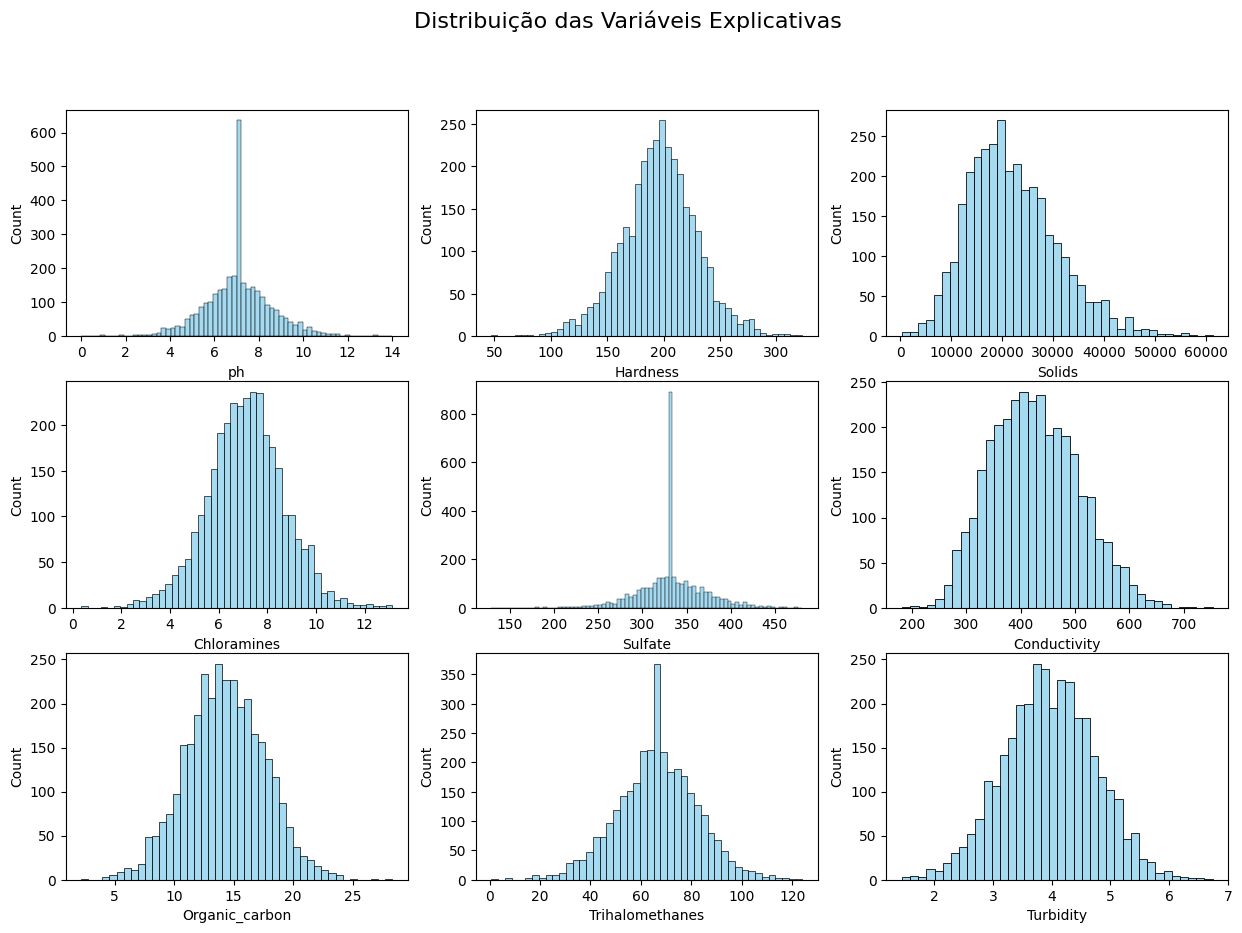

In [ ]:
# Histograma para visualizar distribuições
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    sns.histplot(df[col], kde=True, ax=axes[i//3, i%3], color="skyblue")
fig.suptitle("Distribuição das Variáveis Explicativas", fontsize=16)
plt.show()

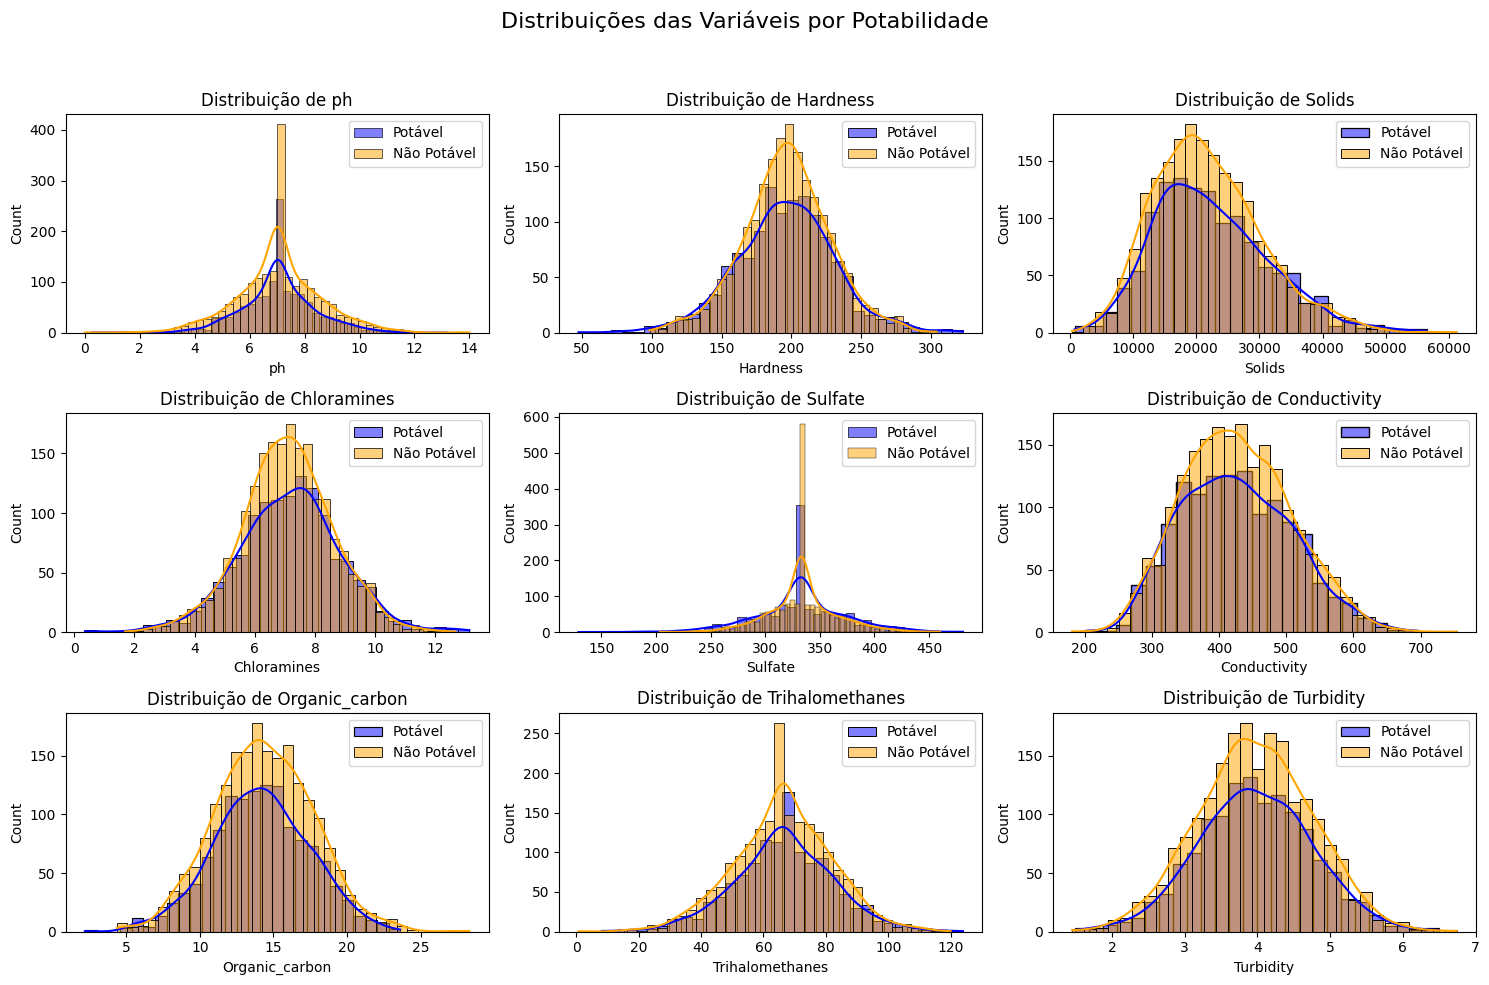

In [91]:
potavel = df[df['Potability'] == 1]  # Dados com Potability = 1
nao_potavel = df[df['Potability'] == 0]  # Dados com Potability = 0

# Configuração do layout com subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # Grade de 3x3
axes = axes.flatten()  # Achatar para um array unidimensional

# Loop pelas variáveis explicativas (exceto 'Potability')
for i, col in enumerate(df.columns[:-1]):  # Exclui a última coluna ('Potability')
    sns.histplot(potavel[col], kde=True, ax=axes[i], color="blue", label="Potável", alpha=0.5)
    sns.histplot(nao_potavel[col], kde=True, ax=axes[i], color="orange", label="Não Potável", alpha=0.5)
    axes[i].set_title(f"Distribuição de {col}", fontsize=12)
    axes[i].legend()  # Adicionar legenda

# Título geral e layout ajustado
fig.suptitle("Distribuições das Variáveis por Potabilidade", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar o título geral
plt.show()

A partir da análise da distribuição conjunta das águas potáveis e não potáveis, observa-se que, independentemente da potabilidade, a distribuição segue um padrão semelhante. As diferenças nas quantidades são atribuídas à variação nos dados entre água potável e não potável.

Através dos boxplots de cada variável, será realizada a análise da presença de outliers. Esses outliers não serão removidos, pois mantê-los no conjunto de dados permite que o modelo considere toda a variabilidade presente, o que é crucial para uma análise mais fiel à realidade.

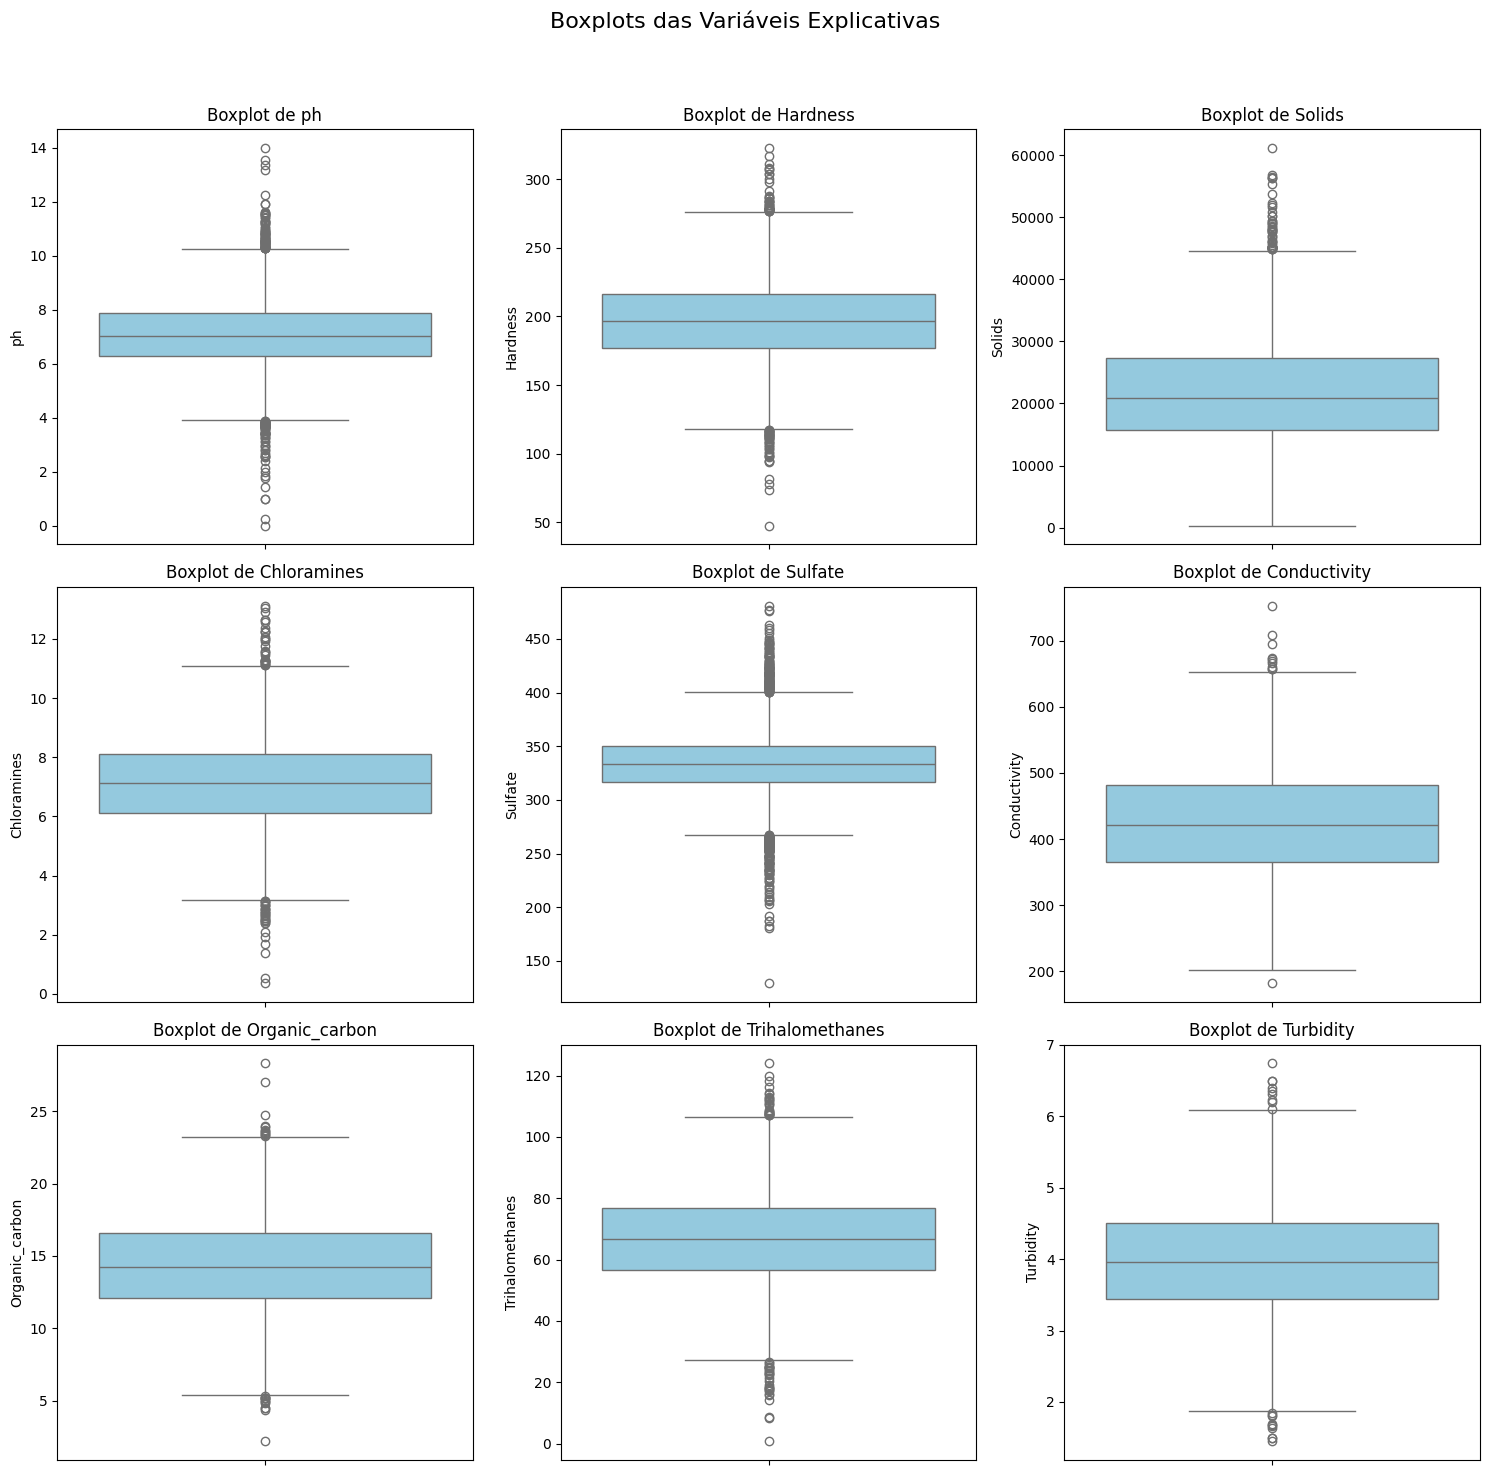

In [96]:
# Explicar Melhor - boxplot  
# perguntar pro gpt se faz sentido nao remover  
# Boxplots para visualizar a distribuição de 9 variáveis
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # 3 linhas, 3 colunas
axes = axes.flatten()  # Achatar a matriz para um array unidimensional

for i, col in enumerate(df.columns[:9]):  # Iterar pelas primeiras 9 colunas
    sns.boxplot(y=df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(f"Boxplot de {col}", fontsize=12)

# Ajuste do layout
fig.suptitle("Boxplots das Variáveis Explicativas", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar o título geral
plt.show()

É possível observar que todas as variáveis possuem outliers.

In [21]:
#verificação se a distribuições são normais 
for i,n in enumerate(df.columns[:-1]):
    stats,p = shapiro(df[n])
    if p>0.05:
        print('A distribuição da variavel',n,'é normal.')
    else:
        print('A distribuição da variavel',n,'é não normal.')

A distribuição da variavel ph é não normal.
A distribuição da variavel Hardness é não normal.
A distribuição da variavel Solids é não normal.
A distribuição da variavel Chloramines é não normal.
A distribuição da variavel Sulfate é não normal.
A distribuição da variavel Conductivity é não normal.
A distribuição da variavel Organic_carbon é normal.
A distribuição da variavel Trihalomethanes é não normal.
A distribuição da variavel Turbidity é normal.


Utilizando o coeficiente de Pearson, foi gerada a matriz de correlação para identificar quais variáveis estão correlacionadas e quais não apresentam correlação.

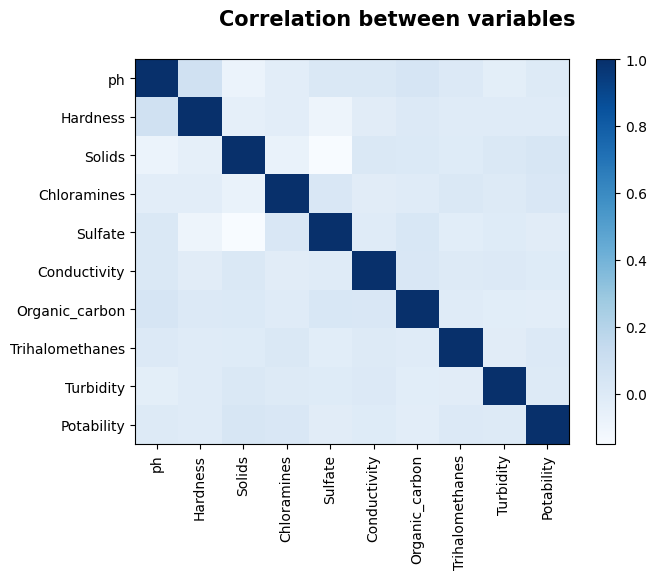

In [22]:
#estudo da correlação 
corr = df.corr()

#Plotando a matriz correlação em um mapa de calor
plt.figure(figsize=(7, 5))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

In [ ]:
#Critério de correlação
criterio = 0.3 

# Criando uma máscara para valores significativos (maiores que 0.7 ou menores que -0.7) e excluindo as correlações 1
mask = (corr.abs() > criterio) & (corr != 1)

# Exibindo a matriz de correlação com a máscara aplicada
print(corr[mask])

                 ph  Hardness  Solids  Chloramines  Sulfate  Conductivity  \
ph              NaN       NaN     NaN          NaN      NaN           NaN   
Hardness        NaN       NaN     NaN          NaN      NaN           NaN   
Solids          NaN       NaN     NaN          NaN      NaN           NaN   
Chloramines     NaN       NaN     NaN          NaN      NaN           NaN   
Sulfate         NaN       NaN     NaN          NaN      NaN           NaN   
Conductivity    NaN       NaN     NaN          NaN      NaN           NaN   
Organic_carbon  NaN       NaN     NaN          NaN      NaN           NaN   
Trihalomethanes NaN       NaN     NaN          NaN      NaN           NaN   
Turbidity       NaN       NaN     NaN          NaN      NaN           NaN   
Potability      NaN       NaN     NaN          NaN      NaN           NaN   

                 Organic_carbon  Trihalomethanes  Turbidity  Potability  
ph                          NaN              NaN        NaN         NaN  
Hard

A partir da matriz de correlação e do código apresentado, pode-se concluir que nenhuma variável apresenta uma correlação significativa com as demais.

#### Modelagem
Nesta seção, será realizada a classificação da água com base em seus atributos. Além disso, será conduzida uma análise para selecionar o modelo mais adequado para essa tarefa, levando em consideração o desempenho e a eficácia de diferentes abordagens na previsão da qualidade da água.

Primeiramente, é necessário transformar a base de dados para começar a classificação.

In [28]:
x = df.drop('Potability',axis=1)
y = df['Potability']
x

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658


Devido à disparidade no número de observações entre águas potáveis e não potáveis, utilizamos a técnica SMOTE (Synthetic Minority Over-sampling Technique) para equilibrar a distribuição das classes, gerando amostras sintéticas da classe minoritária e garantindo uma melhor performance do modelo.

In [ ]:
# Balanceamento dos dados com SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(x, y) 

0       0
1       0
2       0
3       0
4       0
       ..
3991    1
3992    1
3993    1
3994    1
3995    1
Name: Potability, Length: 3996, dtype: int64

Os dados foram padronizados, pois essa é essencial para modelos de classificação. Ele garante que todas as variáveis tenham a mesma escala, evitando que atributos com maiores magnitudes dominem o processo de aprendizado. Além disso, métodos baseados em distância, como KNN e SVM, podem apresentar resultados distorcidos sem essa padronização. Ao normalizar os dados, assegura-se que cada variável contribua de forma equilibrada, melhorando a precisão e eficiência do modelo.

In [ ]:
# Padronização dos dados
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)

array([[-1.68813940e-02,  2.60749865e-01, -1.43966346e-01, ...,
        -1.20046454e+00,  1.34313951e+00, -1.33185439e+00],
       [-2.37778856e+00, -2.08553721e+00, -3.87832921e-01, ...,
         2.86607026e-01, -6.61461844e-01,  7.02222697e-01],
       [ 7.38436157e-01,  8.62211271e-01, -2.43461958e-01, ...,
         8.09728719e-01, -1.73532083e-03, -1.20908595e+00],
       ...,
       [ 1.00039628e-01, -1.39913391e+00,  1.32086018e+00, ...,
        -1.47682416e-01,  4.86345572e-01,  4.66938270e-01],
       [ 1.92263105e-02, -4.87005892e-01,  9.26715184e-01, ...,
        -8.94496616e-01,  1.65618364e-01, -2.52994926e-01],
       [-4.04543367e-01,  1.60193484e+00, -4.93538845e-01, ...,
         3.59299788e-01,  9.52683010e-01,  7.80280948e-01]])

Os dados foram divididos em conjuntos de treino e teste para garantir a avaliação imparcial do desempenho do modelo.

In [ ]:
# Divisão entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)
print('Dados transformados:')
print('Media: ', np.mean(X_res, axis = 0)) #verificação
print('Desvio Padrao:', np.std(X_res, axis = 0))

Dados transformados:
Media:  [-6.22347241e-18 -9.33520862e-18  2.66720246e-18 -3.55626995e-18
  0.00000000e+00 -8.00160738e-18 -4.00080369e-18 -3.55626995e-18
 -3.55626995e-18]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1.]


Neste trecho, o melhor número de vizinhos foi determinado por meio de validação cruzada com um tamanho de 5 (k-fold cross-validation). Além disso, é possível visualizar através do gráfico como a acurácia varia em relação ao número de vizinhos.

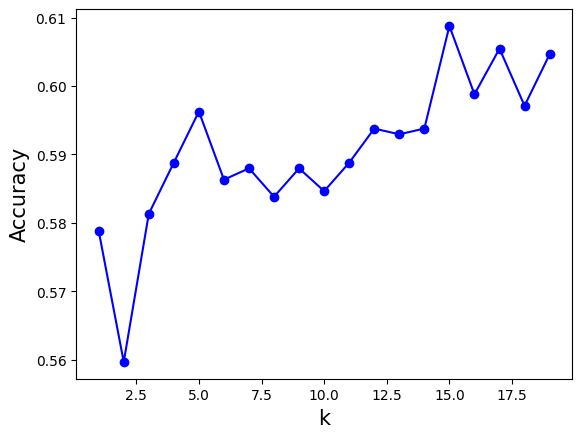

Melhor k: 15
Melhor acurácia: 0.5988075313807532


In [103]:
nkf = 5 #number of folds
vk = [] # armazena os valores de k
vscore = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # realiza a validação cruzada
    cv = cross_validate(model, X_test, y_test, cv=nkf)
    #print('k:', k, 'accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)

plt.plot(vk, vscore, '-bo',color='blue')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)
print('Melhor acurácia:',vscore[best_k])

A partir desse ponto, no trecho de código, foram testados os modelos de Logistic Regression, SVM, Random Forest, KNN e Decision Tree, e comparadas suas respectivas acurácias. No KNN foi utilizado o melhor número de vizinhos obtido no código anterior.

In [84]:
models = {'Logistic Regression': LogisticRegression(random_state=42),
          'SVM':SVC(kernel='linear',random_state=42),
                    'Random Forest': RandomForestClassifier(random_state=42),
                    'KNN': KNeighborsClassifier(n_neighbors=best_k),
                    'Decision Tree': DecisionTreeClassifier(random_state=42)}

results = {}

for model_name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    results[model_name] = acc
    print(f"{model_name} - Acurácia: {acc}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")


Logistic Regression - Acurácia: 0.5187656380316931
              precision    recall  f1-score   support

           0       0.52      0.53      0.53       601
           1       0.52      0.50      0.51       598

    accuracy                           0.52      1199
   macro avg       0.52      0.52      0.52      1199
weighted avg       0.52      0.52      0.52      1199

[[321 280]
 [297 301]]


SVM - Acurácia: 0.5145954962468724
              precision    recall  f1-score   support

           0       0.52      0.53      0.52       601
           1       0.51      0.50      0.51       598

    accuracy                           0.51      1199
   macro avg       0.51      0.51      0.51      1199
weighted avg       0.51      0.51      0.51      1199

[[319 282]
 [300 298]]


Random Forest - Acurácia: 0.6822351959966639
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       601
           1       0.68      0.67      0.68       598

 

Com base nas métricas obtidas, é possível concluir, por enquanto, que os modelos Random Forest e KNN apresentam os melhores resultados para este problema, com uma leve vantagem para o Random Forest, que possui acurácia, precisão, F1-score e recall superiores.

gora, utilizando a validação cruzada para comparar os respectivos modelos, pode-se chegar à mesma conclusão: os dois melhores modelos foram Random Forest e KNN, sendo o Random Forest ligeiramente superior, apresentando melhor acurácia, precisão média, recall médio e F1-score médio

In [85]:
models = {'Logistic Regression': LogisticRegression(random_state=42),
          'SVM':SVC(kernel='linear',random_state=42),
                    'Random Forest': RandomForestClassifier(random_state=42),
                    'KNN': KNeighborsClassifier(n_neighbors=best_k),
                    'Decision Tree': DecisionTreeClassifier(random_state=42)}


results_cv = {}
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

for model_name, model in models.items():
    # Validação cruzada com múltiplas métricas
    scores = cross_validate(model, X_res, y_res, cv=5, scoring=scoring)
    results[model_name] = scores
    print(f"{model_name} - Acurácia Média: {scores['test_accuracy'].mean()}")
    print(f"Precisão Média: {scores['test_precision_macro'].mean()}")
    print(f"Recall Médio: {scores['test_recall_macro'].mean()}")
    print(f"F1-score Médio: {scores['test_f1_macro'].mean()}")
    print("\n")

Logistic Regression - Acurácia Média: 0.513764392991239
Precisão Média: 0.5137621515244303
Recall Médio: 0.5137562656641604
F1-score Médio: 0.5137141322525414


SVM - Acurácia Média: 0.5137643929912391
Precisão Média: 0.5137917965556604
Recall Médio: 0.5137700501253133
F1-score Médio: 0.5131727473790237


Random Forest - Acurácia Média: 0.665677409261577
Precisão Média: 0.6690330077308257
Recall Médio: 0.665622180451128
F1-score Médio: 0.663922656929896


KNN - Acurácia Média: 0.6088676470588236
Precisão Média: 0.6090462658135694
Recall Médio: 0.6088740601503759
F1-score Médio: 0.6086436272408695


Decision Tree - Acurácia Média: 0.5923466833541927
Precisão Média: 0.5937646855036464
Recall Médio: 0.5923176691729323
F1-score Médio: 0.5913053490187078




#### Conclusão
Neste projeto, foi realizada a classificação da potabilidade da água utilizando diversos modelos de aprendizado de máquina. Através da análise descritiva e da validação cruzada, foi possível identificar os dois melhores modelos dentre os testados para esse problema: Random Forest e KNN. Entre eles, o modelo Random Forest se destacou ligeiramente, apresentando melhores resultados em termos de acurácia, precisão média, recall médio e F1-score médio. Esses resultados indicam que o Random Forest é o modelo mais robusto para a tarefa de classificação da potabilidade da água, embora o KNN também tenha mostrado um bom desempenho.

Com isso, concluímos que, para este conjunto de dados e em relação a esses modelos, o Random Forest oferece a melhor performance, sendo uma escolha sólida para a implementação em sistemas de monitoramento da qualidade da água.